In [1]:
from call_functions import *
import plotly.express as px
import matplotlib.pyplot as plt
import tikzplotlib

In [2]:
def get_AB(L,Nx,a,d):
    dx = L / Nx
    Lx = L - dx
    xspan = np.arange(0, Lx + dx, dx) 
    O = np.zeros((Nx, Nx))
    G = Matrix_A_dz(Nx, dx, d)
    I = np.eye(Nx)
    nobs,C = GetC(np.abs(xspan - np.pi) <= a)
    C = -np.dot(C.T, C)
    AB = np.block([[O, -I], [G, C]])
    return AB, C

def get_fAB(L,Nx,a,d):
    Nf = Nx // 2
    dx = L / Nx
    fO = np.zeros((2 * Nf + 1, 2 * Nf + 1))
    fI = -np.eye(2 * Nf + 1)
    fF = np.diag(np.abs(np.concatenate((np.arange(0, Nf + 1), np.arange(-Nf, 0))))*np.tanh(d*np.abs(np.concatenate((np.arange(0, Nf + 1), np.arange(-Nf, 0))))))
    frequences = fftfreq(Nx, dx) * 2 * np.pi  # Assuming the previously defined fftfreq function
    fC = np.real(-((a * np.exp((-1j * np.pi) * (frequences.reshape(-1, 1) - frequences))) / np.pi) * np.sinc(a * (frequences.reshape(-1, 1) - frequences) / np.pi))
    #fC = np.real((a/np.pi) * np.exp(-1j * (frequences - frequences.reshape(-1, 1)) *np.pi) * np.sinc(a * (frequences - frequences.reshape(-1, 1))))
    fAB = np.block([[fO, fI], [fF, fC]])
    return fAB,fC


In [3]:
Nx_list = 10**np.arange(1,3.7,0.1)
Nx_list = Nx_list.astype(int) + abs(Nx_list.astype(int) % 2 - 1).astype(int)
Nx_list[19] = Nx_list[19]+2
#Nx_list[28] = Nx_list[28]+2
Nx_list
Nf_list = Nx_list // 2

### Loop if needed

In [4]:
error = np.zeros(len(Nx_list))
conv_fact = np.zeros(len(Nx_list))
fconv_fact = np.zeros(len(Nx_list))
fconv_fact2 = np.zeros(len(Nx_list))
for i,Nx in  enumerate(Nx_list):
    print('doing ',i,' over ',(len(Nx_list)-1))
    L = 2 * np.pi
    dx = L / Nx
    a = 1/2 * np.pi
    DFT = 1 / Nx * getDFT(Nx)
    iDFT = getiDFT(Nx)
    AB, C = get_AB(L,Nx,a, np.pi)
    fAB, fC = get_fAB(L,Nx,a, np.pi)
    frequences = fftfreq(Nx, dx) * 2 * np.pi
    error[i] = np.linalg.norm(np.real(iDFT @ fC @ DFT) - C)/np.linalg.norm(C)
    eigval_AB, eigvect_AB = np.linalg.eig(AB)
    eigval_fAB, eigvect_fAB = np.linalg.eig(fAB)
    conv_fact[i] = np.max(np.real(eigval_AB)[np.real(eigval_AB) < 0])
    fconv_fact[i] = np.max(np.real(eigval_fAB)[np.real(eigval_fAB) < 0])
    fconv_fact2[i] = np.max(np.real(eigval_fAB)[np.real(eigval_fAB) < -1e-3])

doing  0  over  26
doing  1  over  26
doing  2  over  26
doing  3  over  26
doing  4  over  26
doing  5  over  26
doing  6  over  26
doing  7  over  26
doing  8  over  26
doing  9  over  26
doing  10  over  26
doing  11  over  26
doing  12  over  26
doing  13  over  26
doing  14  over  26
doing  15  over  26
doing  16  over  26
doing  17  over  26
doing  18  over  26
doing  19  over  26
doing  20  over  26
doing  21  over  26
doing  22  over  26
doing  23  over  26
doing  24  over  26
doing  25  over  26
doing  26  over  26


In [8]:
np.save('fconv_fact_1_4_01.npy', fconv_fact)
d = np.load('fconv_fact_1_4_01.npy')
d == fconv_fact

np.save('fconv_fact_v2_1_4_01.npy', fconv_fact2)
d = np.load('fconv_fact_v2_1_4_01.npy')
d == fconv_fact2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

### If loop not needed

In [7]:
fconv_fact = np.load('fconv_fact_1_4_01.npy')
fconv_fact2 = np.load('fconv_fact_v2_1_4_01.npy')

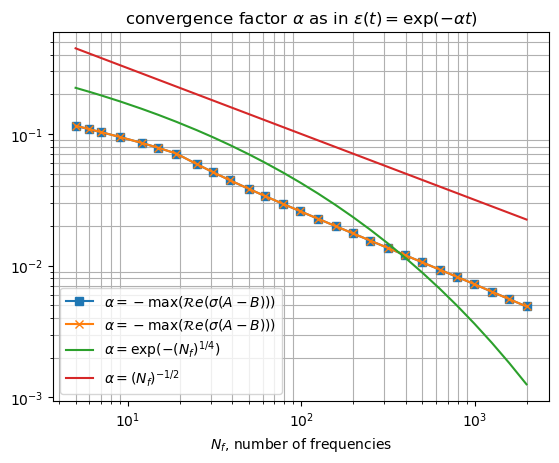

In [10]:
alpha = np.polyfit(np.log(Nf_list),np.log(-fconv_fact),1)[0]
plt.loglog(Nf_list,-fconv_fact,'-s',label=r'$\alpha = -\max(\mathcal{R}e(\sigma(A-B)))$')
#plt.loglog(Nf_list,-fconv_fact2,'-x',label=r'$\alpha = -\max(\mathcal{R}e(\sigma(A-B)))$')
plt.loglog(Nf_list,np.exp(-Nf_list**(1/4)),'-',label=r"$\alpha = \exp(-(N_f)^{1/4})$")
#plt.loglog(Nf_list,np.exp(-Nf_list**(1/3)),'--',label=r"$\alpha = \exp(-(N_f)^{1/3})$")
plt.loglog(Nf_list,(Nf_list)**(-1/2),'-',label=r'$\alpha = (N_f)^{-1/2}$')
plt.xlabel(r'$N_f$, number of frequencies')
plt.grid(which='minor')
plt.legend()
plt.title(r'convergence factor $\alpha$ as in $\varepsilon(t) = \exp(-\alpha t)$')
plt.savefig('convergence_speed.png')

tikzplotlib.save("convergence_speed.tex")